# GJ581 HA

### Set up <tt>python</tt> environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import astropy
from astropy.timeseries import LombScargle
import scipy.optimize as sopt
from scipy.optimize import minimize

# Load our software package
import RedNoiseFALs as rnf 

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", "font.sans-serif":"Arial"})

### Read the dataset using pandas


In this notebook we calculate the FALs for the GLS periodogram of HARPS
activity indicator Hα time series <a href="https://ui.adsabs.harvard.edu/abs/2014Sci...345..440R/abstract">Robertson et al. (2014)</a>, these calculations are featured in section 4.3 of our paper.

In [2]:
data = pd.read_csv('GJ581_Robertson14.txt', delim_whitespace=True, comment='#')
data

,JDB,Halpha,eHalpha,NaD,eNaD,RV,eRV
0,3152.712894,0.08064,0.00104,0.06131,0.00199,-10.25,1.1
1,3158.663460,0.08080,0.00105,0.06627,0.00198,-19.05,1.3
2,3511.773341,0.08054,0.00104,0.06923,0.00186,-7.25,1.2
3,3520.744746,0.08033,0.00103,0.06699,0.00187,10.35,1.4
4,3573.512039,0.07965,0.00110,0.06574,0.00209,0.65,1.3
...,...,...,...,...,...,...,...
234,5690.739963,0.08166,0.00108,0.06031,0.00204,-1.15,1.6
235,5691.692500,0.08241,0.00105,0.06247,0.00209,-11.95,1.4
236,5692.711935,0.08201,0.00108,0.06362,0.00202,-12.75,1.2
237,5693.756575,0.08151,0.00105,0.06438,0.00196,-2.25,1.0


In [3]:
time = np.array(data['JDB'])
obs = np.array(data['Halpha'])
eobs = np.array(data['eHalpha'])


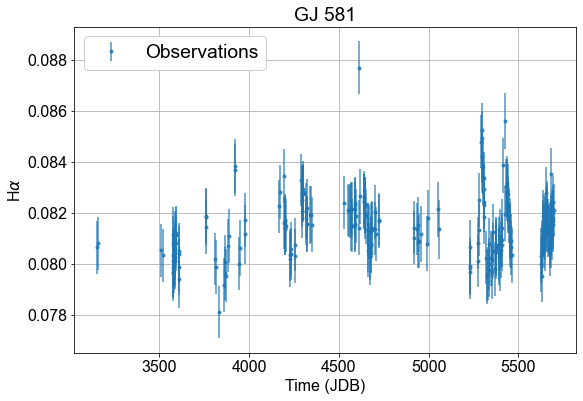

In [4]:
plt.figure(figsize=(9,6))
plt.title(r"GJ 581")
plt.errorbar(time, obs, yerr=eobs, fmt='.', ls=None, alpha=0.8,label= "Observations")
plt.xlabel("Time (JDB)")
plt.ylabel(r'H$\alpha$')
plt.tick_params(axis='y')
plt.grid(axis="both")
plt.legend(loc='upper left',fontsize='large', ncol=1, facecolor='white', framealpha=1)

We rescale this time series to have a median time step of 1 day.

In [5]:
c = np.median(np.diff(time))
time = time/c


### Calculate the LombScargle periodogram 

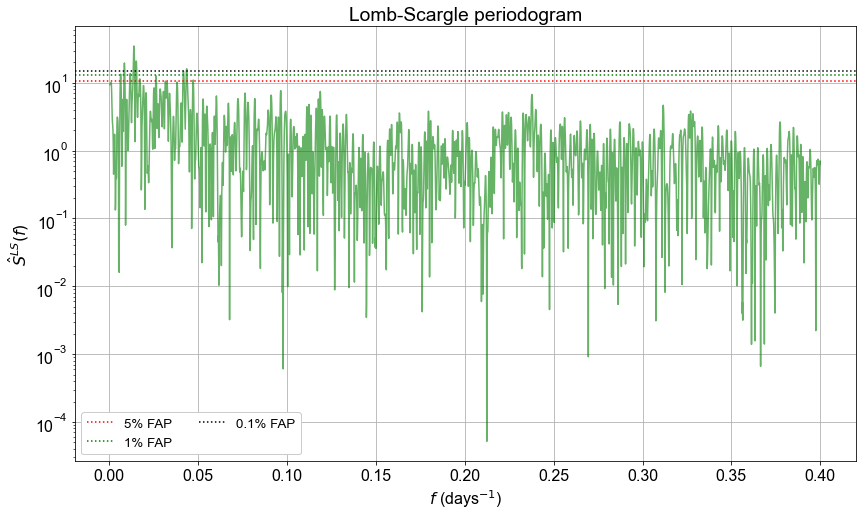

In [6]:
fmax=0.4
fgrid,LS,fals=rnf.LSP(time,obs,fmax)

### Fitting the noise models

#### 1. AR(1) fit

----------------------- AR(1) FITTING RESULTS -------------------
Optimization terminated successfully.
Phi = 0.46
Sigma = 1.03
Whittle negative log-likelihood = 3984.99


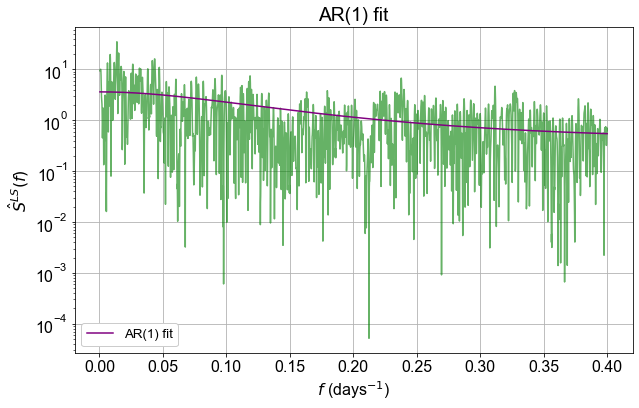

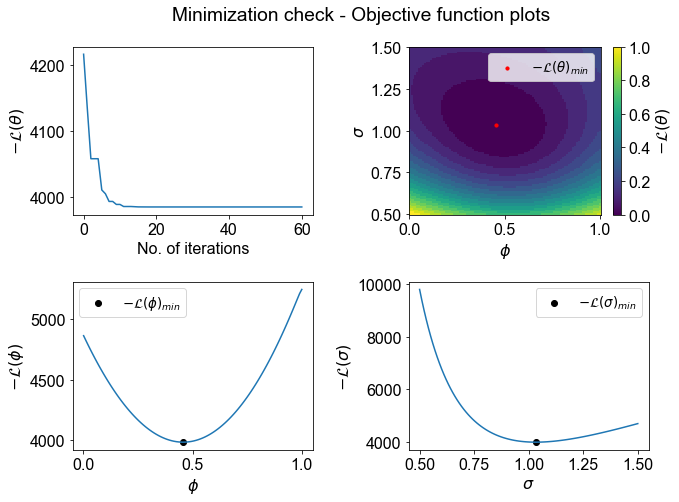

In [7]:
ar = rnf.ar1_fit(fgrid,LS,[0.75,0.9],plot_limits=[(0.001,1),(0.5,1.5)])

In [8]:
(-1/np.log(0.46))*c

2.452231959395378

#### 2. Power law fit

----------------------- POWER LAW FITTING RESULTS -------------------
Optimization terminated successfully.
Slope = -0.63
Intercept = -0.43
Whittle negative log-likelihood = 3897.41


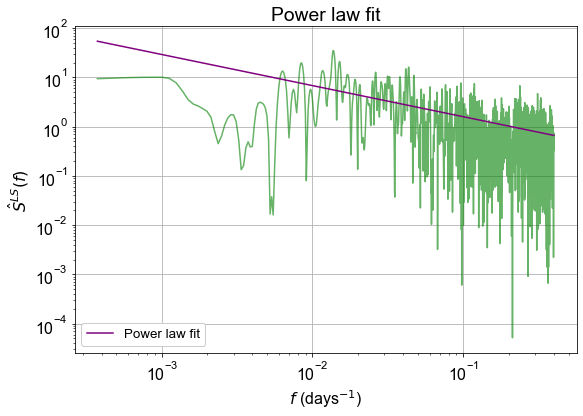

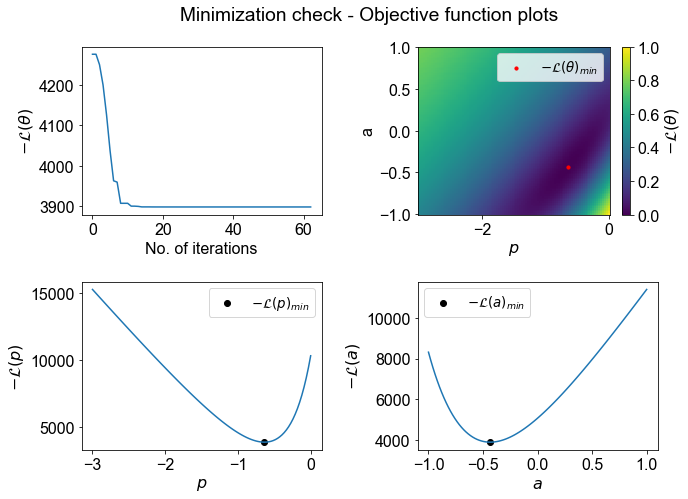

In [9]:
pl = rnf.pl_fit(fgrid,LS,[-1.2,-0.9],plot_limits=[(-3,0),(-1,1)])

#### 3. White noise fit

----------------------- WHITE NOISE FITTING RESULTS -------------------
Optimization terminated successfully.
Power of white noise = 1.55
Whittle negative log-likelihood = 4615.84


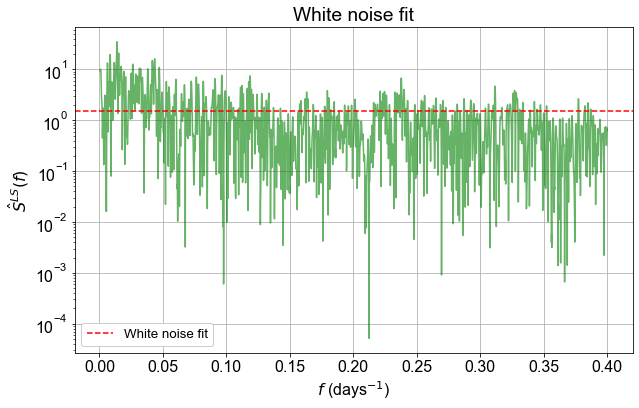

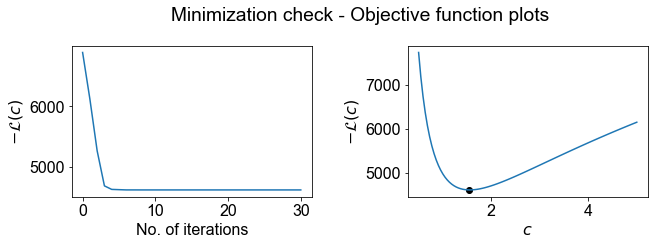

In [10]:
wn = rnf.wn_fit(fgrid,LS,0.5)

### Choosing the best model type

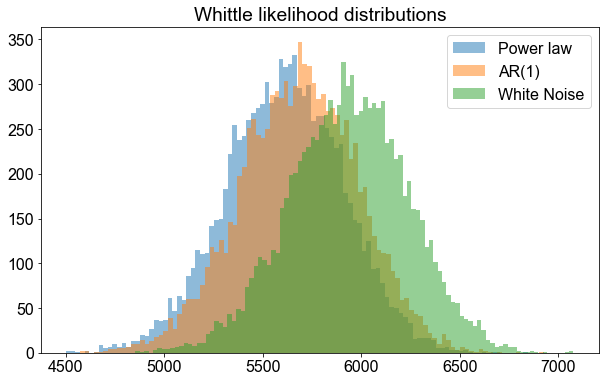

In [12]:

distributions = rnf.gen_distributions(time,obs,eobs,fgrid,save_file = "Demo_GJ581HA.txt",)



### Calculating the FALs

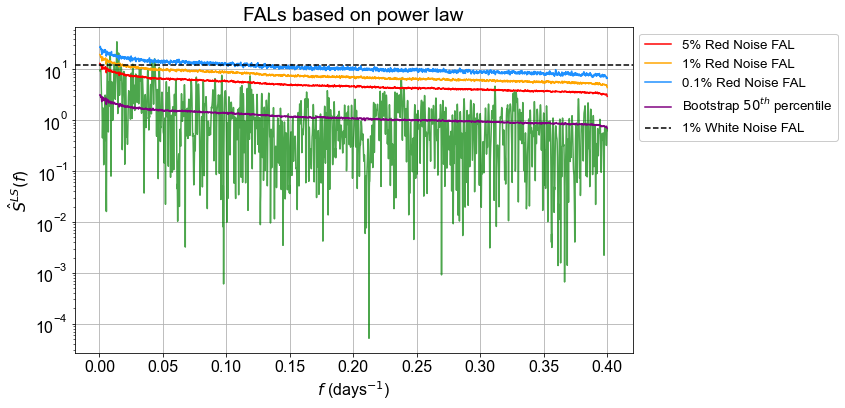

In [13]:
# We get the distribution of parameters to calculate the FALs

slope = distributions[3]
intercept = distributions[4]


fals_pl = rnf.fal_pl(time,obs,fgrid,slope,intercept)

In [ ]:
fals_pl[0]